In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('email.csv')

In [3]:
df.shape

(5573, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.duplicated().sum()

np.int64(415)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(5158, 2)

In [9]:
df.describe()

,Category,Message
count,5158,5158
unique,3,5158
top,ham,isActive:false}
freq,4516,1


In [10]:
df["Category"].value_counts()

Category
ham               4516
spam               641
{"mode":"full"       1
Name: count, dtype: int64

In [11]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [12]:
df.drop(df[df['Category'] == '{"mode":"full"'].index, inplace=True)

In [13]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

In [14]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [15]:
x = df['Message']
y = df['Category']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   int64 
 1   Message   5157 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


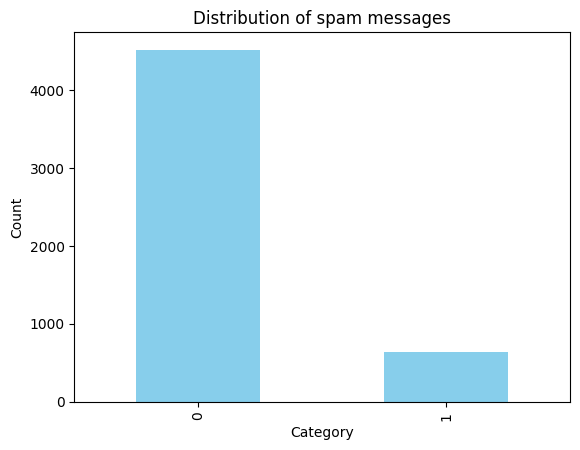

In [18]:
df['Category'].value_counts().plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Distribution of spam messages')
plt.ylabel('Count')

# Show the plot
plt.show()

In [20]:
x = df['Message']
y = df['Category']

x,y

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                 Will ü b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: Message, Length: 5157, dtype: object,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5567    1
 5568    0
 5569    0
 5570    0
 5571    0
 Name: Category, Length: 5157, dtype: int64)

In [39]:
tfidf = TfidfVectorizer(stop_words='english')

In [77]:
x_tfidf = tfidf.fit_transform(x).toarray()

In [87]:
feature_names = tfidf.get_feature_names_out()

In [86]:
tfidf_df = pd.DataFrame(x_tfidf, columns=feature_names)

tfidf_df.tail()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
5152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

In [71]:
model = SVC(class_weight='balanced')

In [72]:
model.fit(x_train, y_train)

SVC(class_weight='balanced')

In [75]:
accuracy = model.score(x_test, y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.90%
